<a href="https://colab.research.google.com/github/irgishalby/Banking-Churn-Prediction-Model/blob/main/Banking_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubh0799/churn-modelling")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 27.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shubh0799/churn-modelling/versions/1


In [3]:
import pandas as pd
df = pd.read_csv(path + "/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop Columns
* Drop: RowNumber, CustomerId, Surname
* Keep (numerical): CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary
* Keep (categorical): Geography, Gender
* Keep (binary): HasCrCard, IsActiveMember
* Target: Exited

In [4]:
drop_cols = ["RowNumber", "CustomerId", "Surname"]
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

## Feature vs Churn

1. check `Excited`
2. numerical features vs churn (one by one).
3. binary features vs churn
4. categorical features vs churn.



### 1. Check `Exited`





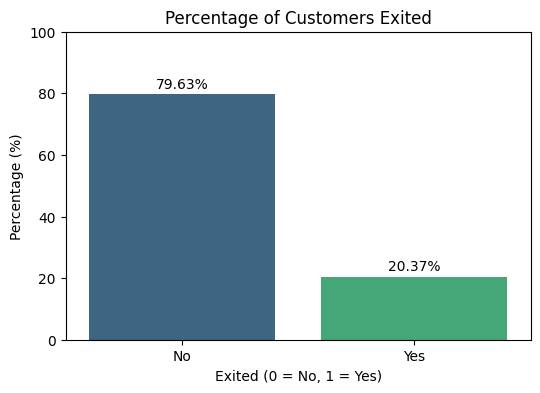

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_percentages = df['Exited'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values, hue=churn_percentages.index, palette='viridis', legend=False)
plt.title('Percentage of Customers Exited')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(0, 100)

for index, value in enumerate(churn_percentages.values):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center')

plt.show()

### 2. Numerical features vs churn

In [6]:
def num_vs_churn(col):
    print(f"Mean {col} by churn:")
    print(df.groupby('Exited')[col].mean())

    df.boxplot(column=col, by='Exited')

Mean Age by churn:
Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64


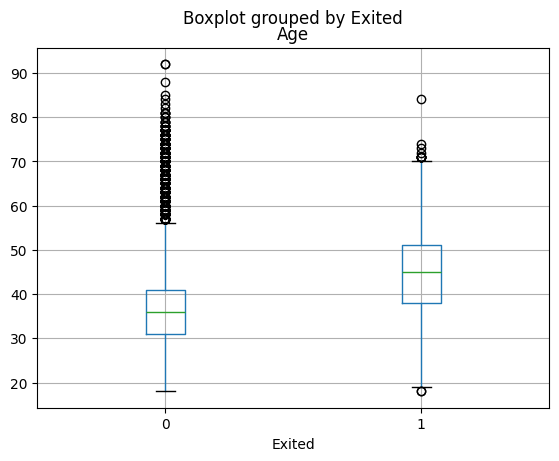

In [7]:
num_vs_churn('Age')

Mean Balance by churn:
Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


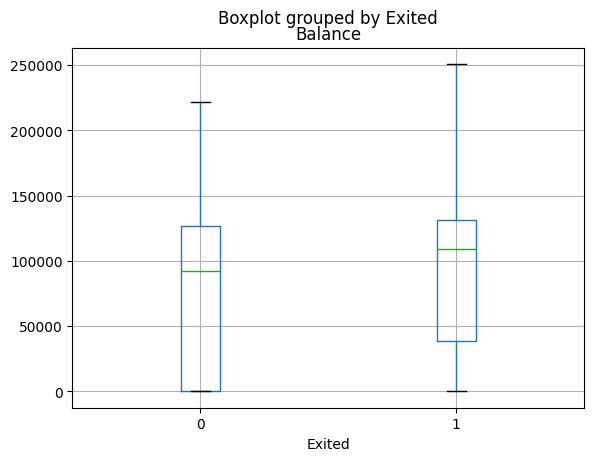

In [8]:
num_vs_churn('Balance')

Mean Tenure by churn:
Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64


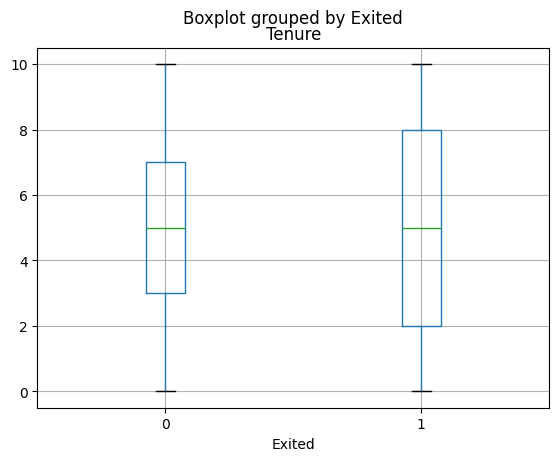

In [9]:
num_vs_churn('Tenure')

Mean CreditScore by churn:
Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


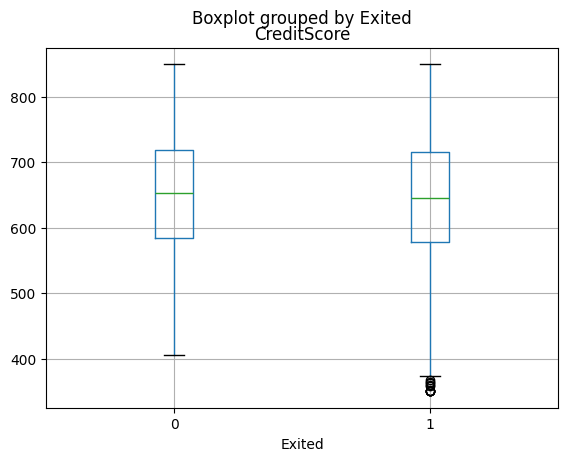

In [10]:
num_vs_churn('CreditScore')

Mean EstimatedSalary by churn:
Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


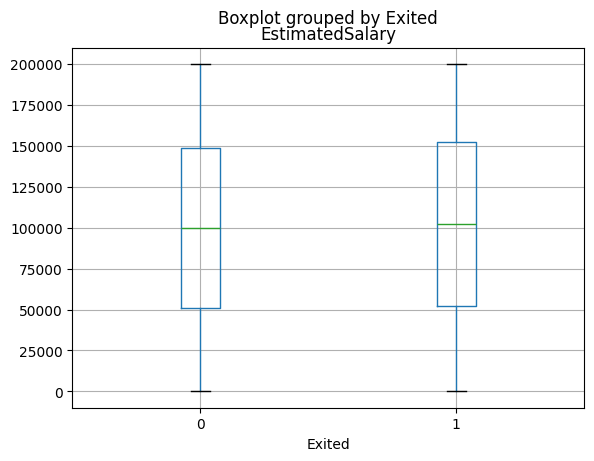

In [11]:
num_vs_churn('EstimatedSalary')

Mean NumOfProducts by churn:
Exited
0    1.544267
1    1.475209
Name: NumOfProducts, dtype: float64


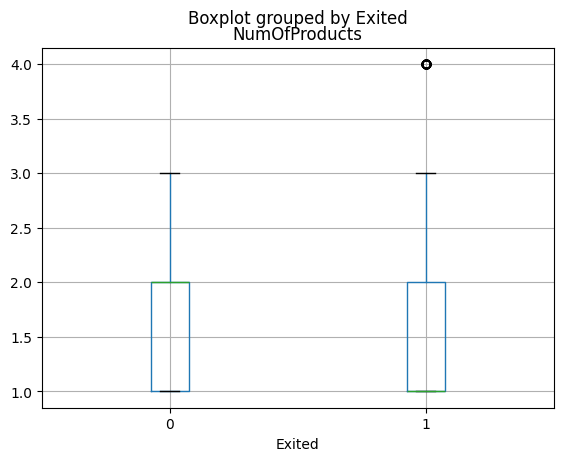

In [12]:
num_vs_churn('NumOfProducts')

### 3. Binary features vs churn

In [13]:
pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100


Exited,0,1
IsActiveMember,,
0,73.149103,26.850897
1,85.730926,14.269074


In [14]:
pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100


Exited,0,1
HasCrCard,,
0,79.185059,20.814941
1,79.815734,20.184266


<Axes: xlabel='IsActiveMember'>

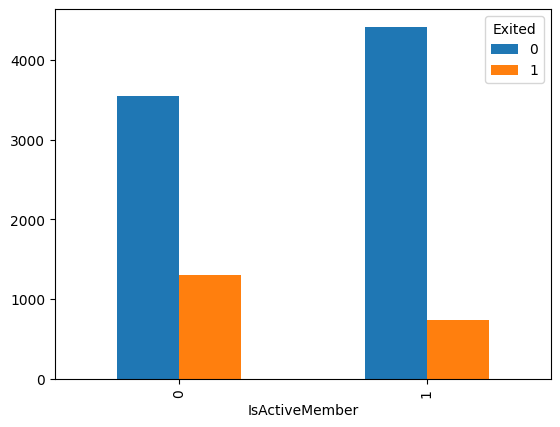

In [15]:
pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar')


### 4. Categorical features vs Churn

In [16]:
pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


In [17]:
pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100


Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928


# Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Modeling

In [23]:
# Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# Define feature types
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_features = ['Geography', 'Gender']
bin_features = ['HasCrCard', 'IsActiveMember']

In [25]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('bin', 'passthrough', bin_features)
    ]
)

In [29]:
# Model pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [30]:
# Train
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender']),
                                                 ('bin', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [53]:
# Eval
from sklearn.metrics import classification_report, roc_auc_score

threshold = 0.45
y_pred_custom = (y_prob >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1593
           1       0.36      0.77      0.49       407

    accuracy                           0.67      2000
   macro avg       0.64      0.71      0.62      2000
weighted avg       0.80      0.67      0.70      2000

ROC-AUC: 0.7771191838988449


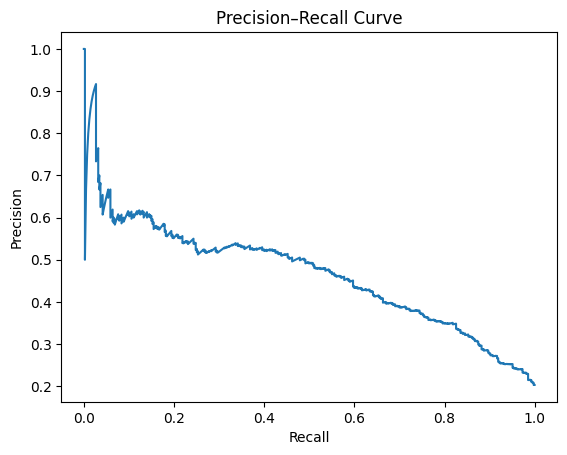

In [49]:
# Precision–Recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

In [50]:
import numpy as np

target_recall = 0.7
idx = np.argmin(np.abs(recall - target_recall))

chosen_threshold = thresholds[idx]
print("Threshold:", chosen_threshold)
print("Precision:", precision[idx])
print("Recall:", recall[idx])


Threshold: 0.4994486010453773
Precision: 0.38670284938941657
Recall: 0.7002457002457002


# RandomForest

In [67]:
df_encoded = pd.get_dummies(
    df,
    columns=['Geography', 'Gender'],
    drop_first=True
)

In [68]:
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [72]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [86]:
# Eval
threshold = 0.21
y_pred_rf = (y_prob_rf >= threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000

ROC-AUC: 0.8552797790085926
